# Contributions

### Some Data clarifications
- The data only has key-point values for single cow
- the dataset maintainer did not account for multiple cows in same image, but there are many images which have multiple cows, this creates descrepency for model that which cow to annotate?
- the data so not have bounding boxes for cows, which we can estimate boounding box for one cow based on the key-points, as mentioned before there are multiple cows in images

### Workflow
There are three works been doe or in progress
1) Object detection
2) Object Segmentation
3) Key-point detection


### 1) Object Detection
- While all cows are not annotated, COCO dataset already has cow as a trainign class, thus infering a pre-trained model trained on COCO should give us bounding boxes, even for multiple instances of cows.

In [1]:
import os
from detection_models import CattleDetection, CattleSegmentation
from config import IMAGE_PATH
from utils import format_image_id

In [2]:
CD = CattleDetection()

C:\ProgramData\Anaconda3\envs\pytorch38\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


array([[ 65.74027 ,  68.68512 , 153.7113  , 148.12845 ],
       [151.10654 ,  82.035225, 256.3741  , 145.55338 ],
       [251.34708 ,  91.285904, 317.58105 , 122.30535 ],
       [296.17535 ,  64.94369 , 379.59723 , 118.1618  ],
       [230.7165  ,  63.05267 , 309.2923  ,  97.06247 ],
       [213.7884  ,  78.67042 , 226.31854 ,  87.97687 ],
       [235.23726 ,  62.937244, 354.10834 , 112.17809 ]], dtype=float32)

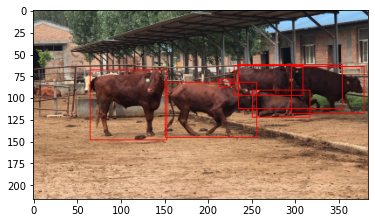

In [3]:
CD.infer_from_binaries(12, plot=True)

array([[242.14807 ,  68.676796, 359.66946 , 148.30144 ],
       [ 83.31346 ,  65.375275, 270.89368 , 179.2614  ]], dtype=float32)

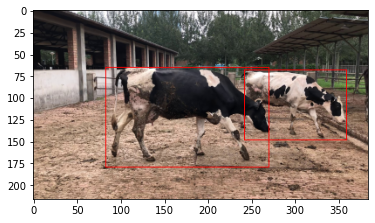

In [7]:
CD.infer_from_binaries(30, plot=True)

array([[141.88388 ,  66.184395, 267.95117 , 142.07353 ],
       [264.29514 ,  91.85811 , 304.1754  , 128.54668 ],
       [  0.      , 149.08734 ,  59.15007 , 202.32875 ]], dtype=float32)

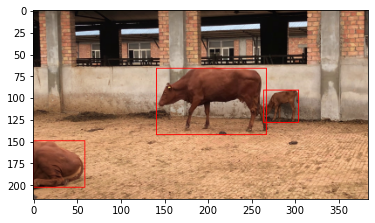

In [13]:
CD.infer_from_binaries(1150, plot=True)

array([[116.08606  ,  69.15868  , 242.56378  , 162.95944  ],
       [ 10.90413  ,  59.80912  ,  95.964676 , 129.203    ],
       [  1.2539393, 111.203415 ,  57.33501  , 150.711    ]],
      dtype=float32)

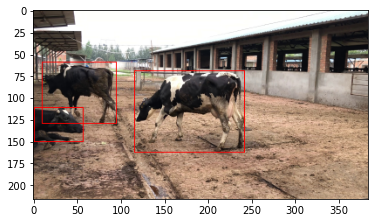

In [9]:
CD.infer_from_binaries(890, plot=True)

### 2) Object Segmentation (in progress)
- Same as object detetcion there are pre-trained segmentation models trained on COCO data

In [2]:
CS = CattleSegmentation()

array([[ 66.47102 ,  67.99954 , 154.38603 , 145.12173 ],
       [153.01003 ,  81.052925, 257.28894 , 145.79086 ],
       [299.24603 ,  64.80009 , 380.34625 , 118.56983 ],
       [251.8396  ,  92.01914 , 321.49417 , 122.233475],
       [228.66862 ,  64.0274  , 322.4204  , 103.04896 ],
       [235.615   ,  61.70626 , 373.23453 , 120.109215],
       [ 58.573227,  75.966545,  72.28786 ,  94.19865 ]], dtype=float32)

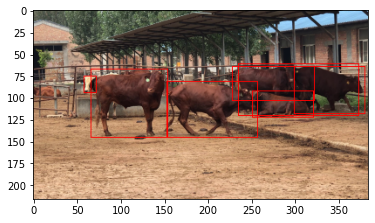

In [6]:
CS.infer_from_binaries(12, plot_box=True)

C:\ProgramData\Anaconda3\envs\pytorch38\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([7, 216, 384])


D:\Projects\cattle_detection\detection_models.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  detected_masks = torch.tensor(torch.squeeze(detected_masks, axis=1), dtype=torch.bool)


array([[ 66.47102 ,  67.99954 , 154.38603 , 145.12173 ],
       [153.01003 ,  81.052925, 257.28894 , 145.79086 ],
       [299.24603 ,  64.80009 , 380.34625 , 118.56983 ],
       [251.8396  ,  92.01914 , 321.49417 , 122.233475],
       [228.66862 ,  64.0274  , 322.4204  , 103.04896 ],
       [235.615   ,  61.70626 , 373.23453 , 120.109215],
       [ 58.573227,  75.966545,  72.28786 ,  94.19865 ]], dtype=float32)

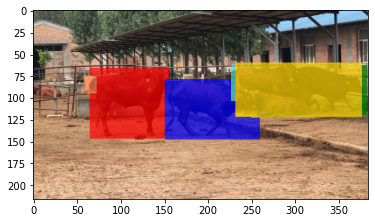

In [3]:
CS.infer_from_binaries(12, plot_box=False, plot_mask=True)